### Statistical Analysis

Here, I am demonstrating some part of statistical analysis that I needed to do for my Ph.D. project (only the part that could be publicly published is included).
The analysis includes a portion (37 rows) of data on properties of prostate Gland, like: 

* Mass
* Volume
* Mechanical Properties (G1, G2, and G3 are some properties of prostate)
* Grade of Cancer
* Locatio  of Cancer

The goal of analysis is to show what properties of prostate gland are changed in the presence of cancer. **For this purpose, we defined alternative hypotheses and try to find the p-value for each hypothesis.** 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import scipy.stats
from scipy import stats
import os 
import math
import warnings
warnings.filterwarnings('ignore')

In [5]:
cwd = os.getcwd()
df = pd.read_csv(cwd + '\ProstateData.csv')
df.drop('RowNumber',axis = 1,inplace=True)
df.dropna(inplace=True)

Then, we define the new metrics for the data. Most of the metrics have been defined in the SQL and only a few are left to be defined in Python.

In [9]:
FS = 12; 
dpi = 600;

df.columns = df.columns.str.strip()
df = df.groupby(['SurgeryDate','DateOfBirth']).tail(3)

df_norm = df.copy()
prop = ['G1','G2','G3']
loc = ['Mid','Apex']
side = ['Right', 'Left']

df_mean = df.groupby(['SurgeryDate','DateOfBirth']).mean()
df_means = pd.merge(df, df_mean,on=['SurgeryDate','DateOfBirth'])


for j in loc:
    for k in side:
        df_norm['EForce'+j+k] = np.array(df['EForce'+j+k]) / np.array(df_means['EForce'+j+k+'_y']) 
        for i in prop:
            df_norm[i+j+k] = np.array(df[i+j+k]) / np.array(df_means[i+j+k+'_y']) 


df_norm is the dataframe we will use in for our analysis. 

In [13]:
df_norm

,SurgeryDate,DateOfBirth,Age,GleasonScore,G1MidLeft,G2MidLeft,G3MidLeft,G1MidRight,G2MidRight,G3MidRight,...,ApexRight-Pos,MidRight-Ant,MidLeft-Ant,ApexLeft-Ant,ApexRight-Ant,Pos,EForceMidLeft,EForceMidRight,EForceApexRight,EForceApexLeft
3,2021-03-15,1951-09-23,70.0,2.0,0.983264,0.908451,1.006849,0.851641,1.318966,0.802817,...,0.0,0.0,1.0,1.0,0.0,0.0,0.910714,0.910714,0.910714,0.910714
4,2021-03-15,1951-09-23,70.0,2.0,0.958159,1.204225,0.904110,1.027104,0.905172,1.014085,...,0.0,0.0,1.0,1.0,0.0,0.0,1.071429,1.071429,1.071429,1.071429
5,2021-03-15,1951-09-23,70.0,2.0,1.058577,0.887324,1.089041,1.121255,0.775862,1.183099,...,0.0,0.0,1.0,1.0,0.0,0.0,1.017857,1.017857,1.017857,1.017857
7,2021-03-19,1953-10-30,68.0,3.0,1.028112,1.054054,1.037838,1.052113,0.950704,1.068750,...,0.0,0.0,0.0,1.0,0.0,1.0,0.968504,1.031250,1.011628,0.925532
8,2021-03-19,1953-10-30,68.0,3.0,1.008032,0.932432,1.005405,0.921127,1.077465,0.918750,...,0.0,0.0,0.0,1.0,0.0,1.0,1.015748,0.984375,0.941860,1.053191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2022-02-08,1950-03-05,72.0,3.0,1.057307,1.065789,1.078652,0.967480,1.094118,0.913043,...,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.937500,1.021277,0.988235
187,2022-02-08,1950-03-05,72.0,3.0,0.954155,0.986842,0.943820,1.024390,0.952941,1.095652,...,0.0,0.0,0.0,0.0,0.0,1.0,0.952381,1.012500,1.085106,1.023529
197,2022-02-14,1952-12-04,69.0,3.0,1.017606,1.000000,1.042781,1.074116,1.007143,1.076087,...,0.0,1.0,0.0,0.0,1.0,0.0,0.921053,1.041667,0.984375,1.000000
198,2022-02-14,1952-12-04,69.0,3.0,1.031690,0.978723,1.026738,0.906499,0.985714,0.864130,...,0.0,1.0,0.0,0.0,1.0,0.0,1.078947,0.916667,1.031250,0.937500


We split the data into two to simply the statistical analysis. We are sure that splitting the attrbuted into two would not affect our statistical analysis. We also rename the columns so the names are more meaningful.

In [17]:

df_mean.dropna(inplace=True)
df_mean.columns
df_mid = df_mean [[ 'Age', 'GleasonScore', 'G1MidLeft', 'G2MidLeft',
       'G3MidLeft', 'G1MidRight', 'G2MidRight', 'G3MidRight', 'MidRight-Pos', 'MidLeft-Pos','MidRight-Ant',
       'MidLeft-Ant', 'Pos', 'EForceMidLeft',
       'EForceMidRight']]
df_apex = df_mean [['Age', 'GleasonScore', 'G1ApexRight',
       'G2ApexRight', 'G3ApexRight', 'G1ApexLeft', 'G2ApexLeft', 'G3ApexLeft',
        'ApexLeft-Pos', 'ApexRight-Pos',
        'ApexLeft-Ant', 'ApexRight-Ant', 'Pos',
        'EForceApexRight', 'EForceApexLeft']]



#Divide Right Properties to Left Properties
for i in prop:
        df_mid.loc[:,i+'Ratio']= df_mid [i+'Mid'+'Right']/df_mid [i+'Mid'+'Left']
        df_apex.loc[:,i+'Ratio']= df_apex [i+'Apex'+'Right']/df_apex [i+'Apex'+'Left']

df_apex.loc[:,'EForceRatio']= df_apex ['EForceApexRight']/df_apex ['EForceApexLeft']
df_mid.loc[:,'EForceRatio']= df_mid ['EForceMidRight']/df_mid ['EForceMidLeft']

In [19]:
df_mid.drop(['G1MidLeft', 'G2MidLeft',
       'G3MidLeft', 'G1MidRight', 'G2MidRight', 'G3MidRight',
             'EForceMidRight','EForceMidLeft'], axis = 1, inplace=True)

df_mid.rename(columns={'MidRight-Pos':'Right-Pos', 'MidLeft-Pos':'Left-Pos',\
                       'MidRight-Ant':'Right-Ant', 'MidLeft-Ant':'Left-Ant'}, inplace=True)

df_apex.drop(['G1ApexRight',
       'G2ApexRight', 'G3ApexRight', 'G1ApexLeft', 'G2ApexLeft', 'G3ApexLeft',
              'EForceApexRight','EForceApexLeft'],axis = 1, inplace = True)
df_apex.rename(columns={'ApexRight-Pos':'Right-Pos', 'ApexLeft-Pos':'Left-Pos',\
                       'ApexRight-Ant':'Right-Ant', 'ApexLeft-Ant':'Left-Ant'}, inplace=True)

Here, we defined a function to demonstrate the location of cancer, based on the data that we have. The location of cancer will be later used for finding a correlation with prostate properties.

In [21]:
def cancer_side (x):
    if (x['Pos'] == 0):      
        if (x['Left-Ant']>x['Right-Ant']):
            return 'Left'
        elif (x['Left-Ant']<x['Right-Ant']):
            return 'Right'
        elif (x['Left-Ant']==x['Right-Ant']):
            return 'Both'
    else:
        if (x['Left-Pos']>x['Right-Pos']):
            return 'Left'
        elif (x['Left-Pos']<x['Right-Pos']):
            return 'Right'
        elif (x['Left-Pos']==x['Right-Pos']):
            return 'Both'

def cancer_loc (x):
    if (x['Pos'] == 0):
        return 'Anterior'
    else:
        return 'Posterior'
    
df_apex ['cancer_side'] = np.array (df_apex.reset_index().apply(lambda x:cancer_side (x),axis=1))
df_apex ['cancer_loc'] = np.array (df_apex.reset_index().apply(lambda x:cancer_loc (x),axis=1))

df_mid ['cancer_side'] = np.array (df_mid.reset_index().apply(lambda x:cancer_side (x),axis=1))
df_mid ['cancer_loc'] = np.array (df_mid.reset_index().apply(lambda x:cancer_loc (x),axis=1))

### Data Exploration Before Starting Statistical Analysis

Before starting the analysis and developing hypothesis, we should first check data for the initial insights about the data and what a reasonable hypothesis would be. For that purpose, the scatter plot works the best for us. 

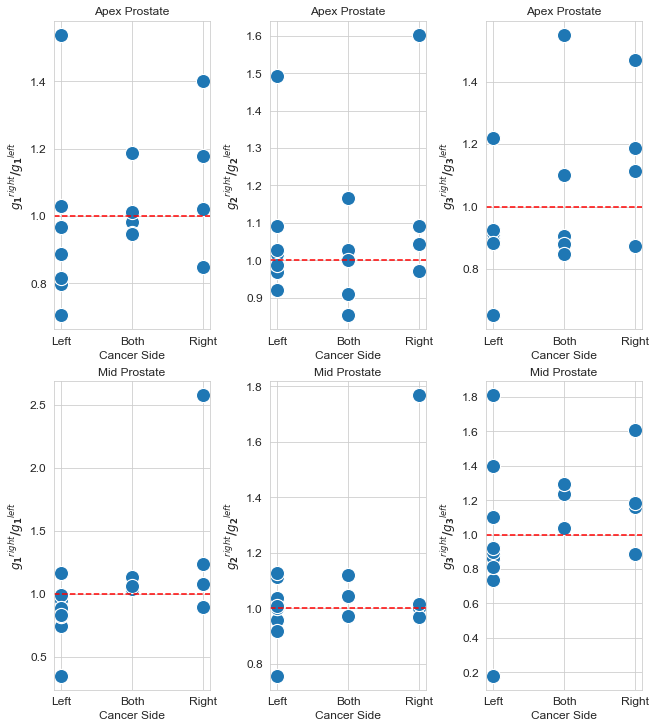

In [32]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(9, 10), constrained_layout=True)

sns.scatterplot(data=df_apex[df_apex['cancer_loc']=='Posterior'].set_index('cancer_side').loc[['Left','Both','Right']],\
                x= 'cancer_side',y= 'G1Ratio',ax=ax[0][0],s = 200);
ax[0][0].tick_params(axis='both', which='major', labelsize=FS)
ax[0][0].set_ylabel('${g_{1}}^{right}/{g_{1}}^{left}$',fontsize= FS);
ax[0][0].set_xlabel('Cancer Side',fontsize= FS);
ax[0][0].set_title('Apex Prostate',fontsize=FS);

sns.scatterplot(data=df_apex[df_apex['cancer_loc']=='Posterior'].set_index('cancer_side').loc[['Left','Both','Right']],\
                x= 'cancer_side',y= 'G2Ratio',ax=ax[0][1],s = 200);
ax[0][1].tick_params(axis='both', which='major', labelsize=FS)
ax[0][1].set_ylabel('${g_{2}}^{right}/{g_{2}}^{left}$',fontsize= FS);
ax[0][1].set_xlabel('Cancer Side',fontsize= FS);
ax[0][1].set_title('Apex Prostate',fontsize=FS);

sns.scatterplot(data=df_apex[df_apex['cancer_loc']=='Posterior'].set_index('cancer_side').loc[['Left','Both','Right']],\
                x= 'cancer_side',y= 'G3Ratio',ax=ax[0][2],s = 200);
ax[0][2].tick_params(axis='both', which='major', labelsize=FS)
ax[0][2].set_ylabel('${g_{3}}^{right}/{g_{3}}^{left}$',fontsize= FS);
ax[0][2].set_xlabel('Cancer Side',fontsize= FS);
ax[0][2].set_title('Apex Prostate',fontsize=FS);

######################################

sns.scatterplot(data=df_mid[df_mid['cancer_loc']=='Posterior'].set_index('cancer_side').loc[['Left','Both','Right']],\
                x= 'cancer_side',y= 'G1Ratio',ax=ax[1][0],s = 200);
ax[1][0].tick_params(axis='both', which='major', labelsize=FS)
ax[1][0].set_ylabel('${g_{1}}^{right}/{g_{1}}^{left}$',fontsize= FS);
ax[1][0].set_xlabel('Cancer Side',fontsize= FS);
ax[1][0].set_title('Mid Prostate',fontsize=FS);

sns.scatterplot(data=df_mid[df_mid['cancer_loc']=='Posterior'].set_index('cancer_side').loc[['Left','Both','Right']],\
                x= 'cancer_side',y= 'G2Ratio',ax=ax[1][1],s = 200);
ax[1][1].tick_params(axis='both', which='major', labelsize=FS)
ax[1][1].set_ylabel('${g_{2}}^{right}/{g_{2}}^{left}$',fontsize= FS);
ax[1][1].set_xlabel('Cancer Side',fontsize= FS);
ax[1][1].set_title('Mid Prostate',fontsize=FS);

sns.scatterplot(data=df_mid[df_mid['cancer_loc']=='Posterior'].set_index('cancer_side').loc[['Left','Both','Right']],\
                x= 'cancer_side',y= 'G3Ratio',ax=ax[1][2],s = 200);
ax[1][2].tick_params(axis='both', which='major', labelsize=FS)
ax[1][2].set_ylabel('${g_{3}}^{right}/{g_{3}}^{left}$',fontsize= FS);
ax[1][2].set_xlabel('Cancer Side',fontsize= FS);
ax[1][2].set_title('Mid Prostate',fontsize=FS);
for i in [0,1]:
    for j in [0,1,2]:
        ax[i][j].axhline(y=1, color='r', linestyle='--');

**We observe that when the cancer is on right, the y-axis values are higher compared to when the cancer is on left or on both side**

That gives us a suggestion for a reasonable hypothesis. We can find the p-values and check the significance of this hypothesis.

We can also check the potential effects of other attributes; for example, we will check the effect of Gleason Score (a number that specifies the grade of cancer). Since, we laready see the effect of cancer location, we should now check if the Gleason Score is effective when the cancer location is fixed.  

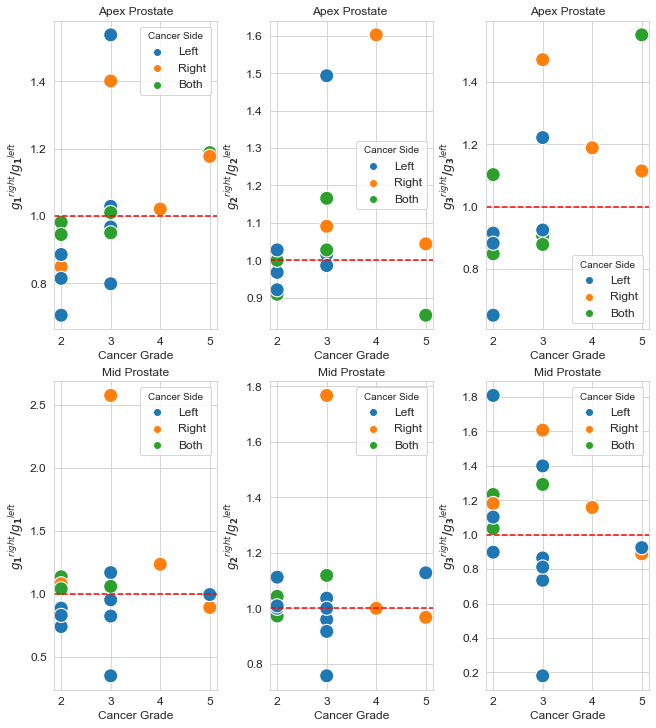

In [58]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(9, 10), constrained_layout=True)

sns.scatterplot(data=df_apex[df_apex['cancer_loc']=='Posterior'].set_index('GleasonScore'),\
                x= 'GleasonScore',y= 'G1Ratio',ax=ax[0][0],s = 200, hue = 'cancer_side');
ax[0][0].tick_params(axis='both', which='major', labelsize=FS)
ax[0][0].set_ylabel('${g_{1}}^{right}/{g_{1}}^{left}$',fontsize= FS);
ax[0][0].set_xlabel('Cancer Grade',fontsize= FS);
ax[0][0].set_title('Apex Prostate',fontsize=FS);
ax[0][0].legend(title='Cancer Side', fontsize=FS) 


sns.scatterplot(data=df_apex[df_apex['cancer_loc']=='Posterior'].set_index('GleasonScore'),\
                x= 'GleasonScore',y= 'G2Ratio',ax=ax[0][1],s = 200, hue = 'cancer_side');
ax[0][1].tick_params(axis='both', which='major', labelsize=FS)
ax[0][1].set_ylabel('${g_{2}}^{right}/{g_{2}}^{left}$',fontsize= FS);
ax[0][1].set_xlabel('Cancer Grade',fontsize= FS);
ax[0][1].set_title('Apex Prostate ',fontsize=FS);
ax[0][1].legend(title='Cancer Side', fontsize=FS);

sns.scatterplot(data=df_apex[df_apex['cancer_loc']=='Posterior'].set_index('GleasonScore'),\
                x= 'GleasonScore',y= 'G3Ratio',ax=ax[0][2],s = 200, hue = 'cancer_side');
ax[0][2].tick_params(axis='both', which='major', labelsize=FS)
ax[0][2].set_ylabel('${g_{3}}^{right}/{g_{3}}^{left}$',fontsize= FS);
ax[0][2].set_xlabel('Cancer Grade',fontsize= FS);
ax[0][2].set_title('Apex Prostate',fontsize=FS);
ax[0][2].legend(title='Cancer Side', fontsize=FS)

######################################

sns.scatterplot(data=df_mid[df_mid['cancer_loc']=='Posterior'].set_index('GleasonScore') ,\
                x= 'GleasonScore',y= 'G1Ratio',ax=ax[1][0],\
                s = 200,color = '#d58234', hue = 'cancer_side');
ax[1][0].tick_params(axis='both', which='major', labelsize=FS)
ax[1][0].set_ylabel('${g_{1}}^{right}/{g_{1}}^{left}$',fontsize= FS);
ax[1][0].set_xlabel('Cancer Grade',fontsize= FS);
ax[1][0].set_title('Mid Prostate',fontsize=FS);
ax[1][0].legend(title='Cancer Side', fontsize=FS)

sns.scatterplot(data=df_mid[df_mid['cancer_loc']=='Posterior'].set_index('GleasonScore'),\
                x= 'GleasonScore',y= 'G2Ratio',ax=ax[1][1],\
                s = 200,color = '#d58234', hue = 'cancer_side');
ax[1][1].tick_params(axis='both', which='major', labelsize=FS)
ax[1][1].set_ylabel('${g_{2}}^{right}/{g_{2}}^{left}$',fontsize= FS);
ax[1][1].set_xlabel('Cancer Grade',fontsize= FS);
ax[1][1].set_title('Mid Prostate',fontsize=FS);
ax[1][1].legend(title='Cancer Side', fontsize=FS)

sns.scatterplot(data=df_mid[df_mid['cancer_loc']=='Posterior'].set_index('GleasonScore'),\
                x= 'GleasonScore',y= 'G3Ratio',ax=ax[1][2],\
                s = 200,color = '#d58234', hue = 'cancer_side');
ax[1][2].tick_params(axis='both', which='major', labelsize=FS)
ax[1][2].set_ylabel('${g_{3}}^{right}/{g_{3}}^{left}$',fontsize= FS);
ax[1][2].set_xlabel('Cancer Grade',fontsize= FS);
ax[1][2].set_title('Mid Prostate',fontsize=FS);
ax[1][2].legend(title='Cancer Side', fontsize=FS)


for i in [0,1]:
    for j in [0,1,2]:
        ax[i][j].axhline(y=1, color='r', linestyle='--');
fig.savefig('Fig11.tif', dpi=dpi)

It seems that the cancer grade and cancer grade does not affect the y-xis (prostate properties). 
We should do the same for other attributes

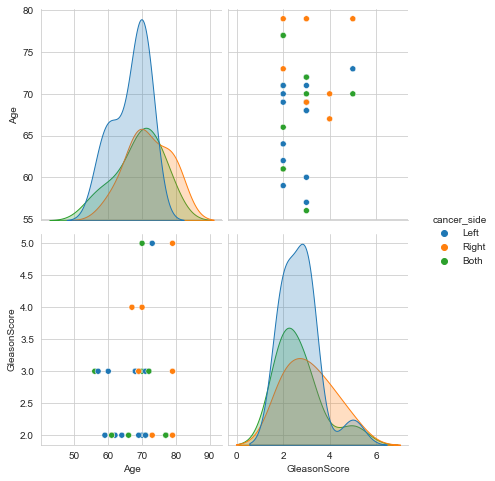

In [59]:
H = sns.pairplot(df_mid[['Age', 'GleasonScore', 'cancer_side',
       'cancer_loc']],hue = 'cancer_side')
H.fig.set_size_inches(7,7)

The figure shows that other parameters also do not affect the cancer_side, and so they are not correlated with the prostate properties. 

**Therefore, we conclude that the important parameters (those that affect the location of cancer), are only the prostate properties** 

### Model's Sensitivity

In [54]:
g1 = np.concatenate((qlv_norm['G1MidLeft'], qlv_norm['G1MidRight'],qlv_norm['G1ApexRight'],\
                   qlv_norm['G1ApexLeft']), axis=0)
g2 = np.concatenate((qlv_norm['G2MidLeft'], qlv_norm['G2MidRight'],qlv_norm['G2ApexRight'],\
                   qlv_norm['G2ApexLeft']), axis=0)
g3 = np.concatenate((qlv_norm['G3MidLeft'], qlv_norm['G3MidRight'],qlv_norm['G3ApexRight'],\
                   qlv_norm['G3ApexLeft']), axis=0)


In [55]:
G = pd.DataFrame({'$g_1/{{g_1}^{avg}}$':g1, '$g_2/{{g_2}^{avg}}$':g2,'$g_3/{{g_3}^{avg}}$':g3})
F = pd.DataFrame({'$\u03C3_E/{{\u03C3_E}^{avg}}$':np.concatenate((qlv_norm['EForceMidLeft'], \
                                                  qlv_norm['EForceMidRight'],\
                                                  qlv_norm['EForceApexLeft'],\
                                                  qlv_norm['EForceApexRight']), axis=0)})

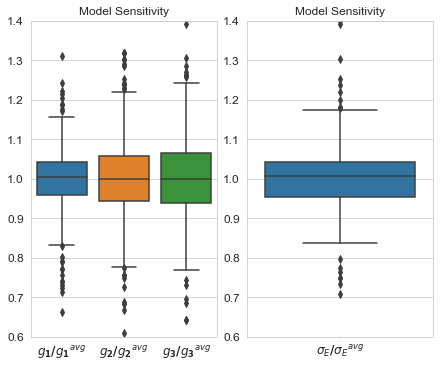

In [56]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(6, 5), constrained_layout=True)
sns.boxplot(data = G,ax=ax[0]);
ax[0].tick_params(axis='both', which='major', labelsize=FS)
ax[0].tick_params(axis='both', which='major', labelsize=FS)
ax[0].set_title('Model Sensitivity',fontsize = FS);
ax[0].set_ylim([0.6,1.4]);

sns.boxplot(data = F,ax=ax[1]);
ax[1].tick_params(axis='both', which='major', labelsize=FS)
ax[1].tick_params(axis='both', which='major', labelsize=FS)
ax[1].set_title('Model Sensitivity',fontsize = FS);
ax[1].set_ylim([0.6,1.4]);


### Statistical Analysis and Hypothesis Testing

We first find confidence interval to check if the hypothesis we are proposing is meaningful. The results included here have 32 rows of data and so it is not very accurate if we assume their distribution is normal.  **However, we can use Central Limit Theory (CLT)** which says that the mean of samples should follow the normal distribution. Assuming that CLT is valid, we can find the 95% confidence interval by considering **t-student's distribution**:

In [79]:
stat  = pd.DataFrame()

df_both = pd.concat ([df_apex, df_mid])

stat  ['Count']= df_both[df_apex['cancer_loc'] == 'Posterior']\
[['G1Ratio','cancer_side']].groupby('cancer_side').count()

stat  ['G1Ratio_mean']= df_both[df_apex['cancer_loc'] == 'Posterior']\
[['G1Ratio','cancer_side']].groupby('cancer_side').mean()
stat  ['G2Ratio_mean']= df_both[df_apex['cancer_loc'] == 'Posterior']\
[['G2Ratio','cancer_side']].groupby('cancer_side').mean()
stat  ['G3Ratio_mean']= df_both[df_apex['cancer_loc'] == 'Posterior']\
[['G3Ratio','cancer_side']].groupby('cancer_side').mean()
stat  ['EForceRatio_mean']= df_both[df_apex['cancer_loc'] == 'Posterior']\
[['EForceRatio','cancer_side']].groupby('cancer_side').mean()

stat  ['G1Ratio_std']= df_both[df_apex['cancer_loc'] == 'Posterior']\
[['G1Ratio','cancer_side']].groupby('cancer_side').std()
stat  ['G2Ratio_std']= df_both[df_apex['cancer_loc'] == 'Posterior']\
[['G2Ratio','cancer_side']].groupby('cancer_side').std()
stat  ['G3Ratio_std']= df_both[df_apex['cancer_loc'] == 'Posterior']\
[['G3Ratio','cancer_side']].groupby('cancer_side').std()
stat  ['EForceRatio_std']= df_both[df_apex['cancer_loc'] == 'Posterior']\
[['EForceRatio','cancer_side']].groupby('cancer_side').std()

##### Confidence Interval for When Cancer is Appeared on Both Sides

In [80]:
stat_CI1 = pd.DataFrame(columns=['Statistics', 'G1','G2','G3'])
stat_CI1 ['Statistics'] = ['Mean','Margin_of_error','Reliability_factor','Lower','Higher']
stat_CI1.set_index('Statistics',inplace=True)

stat_CI1.loc ['Mean','G1'] = stat .loc['Both','G1Ratio_mean'] 
stat_CI1.loc ['Mean','G2'] = stat .loc['Both','G2Ratio_mean'] 
stat_CI1.loc ['Mean','G3'] = stat .loc['Both','G3Ratio_mean'] 

stat_CI1.loc ['Margin_of_error','G1'] = stat .loc['Both','G1Ratio_std']/np.sqrt(stat .loc['Both','Count'])
stat_CI1.loc ['Margin_of_error','G2'] = stat .loc['Both','G2Ratio_std']/np.sqrt(stat .loc['Both','Count'])
stat_CI1.loc ['Margin_of_error','G3'] = stat .loc['Both','G3Ratio_std']/np.sqrt(stat .loc['Both','Count'])

stat_CI1.loc ['Reliability_factor','G1'] = stats.t.ppf(1-0.025, stat .loc['Both','Count']-1)
stat_CI1.loc ['Reliability_factor','G2'] = stats.t.ppf(1-0.025, stat .loc['Both','Count']-1)
stat_CI1.loc ['Reliability_factor','G3'] = stats.t.ppf(1-0.025, stat .loc['Both','Count']-1)

stat_CI1.loc ['Lower','G1'] = stat_CI1.loc ['Mean','G1'] - stat_CI1.loc ['Reliability_factor','G1'] * stat_CI1.loc ['Margin_of_error','G1']
stat_CI1.loc ['Lower','G2'] = stat_CI1.loc ['Mean','G2'] - stat_CI1.loc ['Reliability_factor','G2'] * stat_CI1.loc ['Margin_of_error','G2']
stat_CI1.loc ['Lower','G3'] = stat_CI1.loc ['Mean','G3'] - stat_CI1.loc ['Reliability_factor','G3'] * stat_CI1.loc ['Margin_of_error','G3']

stat_CI1.loc ['Higher','G1'] = stat_CI1.loc ['Mean','G1'] + stat_CI1.loc ['Reliability_factor','G1'] * stat_CI1.loc ['Margin_of_error','G1']
stat_CI1.loc ['Higher','G2'] = stat_CI1.loc ['Mean','G2'] + stat_CI1.loc ['Reliability_factor','G2'] * stat_CI1.loc ['Margin_of_error','G2']
stat_CI1.loc ['Higher','G3'] = stat_CI1.loc ['Mean','G3'] + stat_CI1.loc ['Reliability_factor','G3'] * stat_CI1.loc ['Margin_of_error','G3']

stat_CI1

,G1,G2,G3
Statistics,,,
Mean,1.038192,1.011195,1.10585
Margin_of_error,0.030585,0.036284,0.085706
Reliability_factor,2.364624,2.364624,2.364624
Lower,0.965869,0.925398,0.903188
Higher,1.110514,1.096993,1.308512


##### Confidence Interval for When Cancer is Appeared on Right Side

In [82]:
stat_CI2 = pd.DataFrame(columns=['Statistics', 'G1','G2','G3'])
stat_CI2 ['Statistics'] = ['Mean','Margin_of_error','Reliability_factor','Lower','Higher']
stat_CI2.set_index('Statistics',inplace=True)

stat_CI2.loc ['Mean','G1'] = stat .loc['Right','G1Ratio_mean'] 
stat_CI2.loc ['Mean','G2'] = stat .loc['Right','G2Ratio_mean'] 
stat_CI2.loc ['Mean','G3'] = stat .loc['Right','G3Ratio_mean'] 

stat_CI2.loc ['Margin_of_error','G1'] = stat .loc['Right','G1Ratio_std']/np.sqrt(stat .loc['Right','Count'])
stat_CI2.loc ['Margin_of_error','G2'] = stat .loc['Right','G2Ratio_std']/np.sqrt(stat .loc['Right','Count'])
stat_CI2.loc ['Margin_of_error','G3'] = stat .loc['Right','G3Ratio_std']/np.sqrt(stat .loc['Right','Count'])

stat_CI2.loc ['Reliability_factor','G1'] = stats.t.ppf(1-0.025, stat .loc['Right','Count']-1)
stat_CI2.loc ['Reliability_factor','G2'] = stats.t.ppf(1-0.025, stat .loc['Right','Count']-1)
stat_CI2.loc ['Reliability_factor','G3'] = stats.t.ppf(1-0.025, stat .loc['Right','Count']-1)

stat_CI2.loc ['Lower','G1'] = stat_CI2.loc ['Mean','G1'] - stat_CI2.loc ['Reliability_factor','G1'] * stat_CI2.loc ['Margin_of_error','G1']
stat_CI2.loc ['Lower','G2'] = stat_CI2.loc ['Mean','G2'] - stat_CI2.loc ['Reliability_factor','G2'] * stat_CI2.loc ['Margin_of_error','G2']
stat_CI2.loc ['Lower','G3'] = stat_CI2.loc ['Mean','G3'] - stat_CI2.loc ['Reliability_factor','G3'] * stat_CI2.loc ['Margin_of_error','G3']

stat_CI2.loc ['Higher','G1'] = stat_CI2.loc ['Mean','G1'] + stat_CI2.loc ['Reliability_factor','G1'] * stat_CI2.loc ['Margin_of_error','G1']
stat_CI2.loc ['Higher','G2'] = stat_CI2.loc ['Mean','G2'] + stat_CI2.loc ['Reliability_factor','G2'] * stat_CI2.loc ['Margin_of_error','G2']
stat_CI2.loc ['Higher','G3'] = stat_CI2.loc ['Mean','G3'] + stat_CI2.loc ['Reliability_factor','G3'] * stat_CI2.loc ['Margin_of_error','G3']

stat_CI2

,G1,G2,G3
Statistics,,,
Mean,1.277929,1.182146,1.185389
Margin_of_error,0.195788,0.111641,0.089674
Reliability_factor,2.364624,2.364624,2.364624
Lower,0.814965,0.918158,0.973344
Higher,1.740893,1.446135,1.397435


##### Confidence Interval for When Cancer is Appeared on Left Side

In [84]:
stat_CI3 = pd.DataFrame(columns=['Statistics', 'G1','G2','G3'])
stat_CI3 ['Statistics'] = ['Mean','Margin_of_error','Reliability_factor','Lower','Higher']
stat_CI3.set_index('Statistics',inplace=True)

stat_CI3.loc ['Mean','G1'] = stat .loc['Left','G1Ratio_mean'] 
stat_CI3.loc ['Mean','G2'] = stat .loc['Left','G2Ratio_mean'] 
stat_CI3.loc ['Mean','G3'] = stat .loc['Left','G3Ratio_mean'] 

stat_CI3.loc ['Margin_of_error','G1'] = stat .loc['Left','G1Ratio_std']/np.sqrt(stat .loc['Left','Count'])
stat_CI3.loc ['Margin_of_error','G2'] = stat .loc['Left','G2Ratio_std']/np.sqrt(stat .loc['Left','Count'])
stat_CI3.loc ['Margin_of_error','G3'] = stat .loc['Left','G3Ratio_std']/np.sqrt(stat .loc['Left','Count'])

stat_CI3.loc ['Reliability_factor','G1'] = stats.t.ppf(1-0.025, stat .loc['Left','Count']-1)
stat_CI3.loc ['Reliability_factor','G2'] = stats.t.ppf(1-0.025, stat .loc['Left','Count']-1)
stat_CI3.loc ['Reliability_factor','G3'] = stats.t.ppf(1-0.025, stat .loc['Left','Count']-1)

stat_CI3.loc ['Lower','G1'] = stat_CI3.loc ['Mean','G1'] - stat_CI3.loc ['Reliability_factor','G1'] * stat_CI3.loc ['Margin_of_error','G1']
stat_CI3.loc ['Lower','G2'] = stat_CI3.loc ['Mean','G2'] - stat_CI3.loc ['Reliability_factor','G2'] * stat_CI3.loc ['Margin_of_error','G2']
stat_CI3.loc ['Lower','G3'] = stat_CI3.loc ['Mean','G3'] - stat_CI3.loc ['Reliability_factor','G3'] * stat_CI3.loc ['Margin_of_error','G3']

stat_CI3.loc ['Higher','G1'] = stat_CI3.loc ['Mean','G1'] + stat_CI3.loc ['Reliability_factor','G1'] * stat_CI3.loc ['Margin_of_error','G1']
stat_CI3.loc ['Higher','G2'] = stat_CI3.loc ['Mean','G2'] + stat_CI3.loc ['Reliability_factor','G2'] * stat_CI3.loc ['Margin_of_error','G2']
stat_CI3.loc ['Higher','G3'] = stat_CI3.loc ['Mean','G3'] + stat_CI3.loc ['Reliability_factor','G3'] * stat_CI3.loc ['Margin_of_error','G3']

stat_CI3

,G1,G2,G3
Statistics,,,
Mean,0.892971,1.026336,0.945625
Margin_of_error,0.061753,0.038033,0.086755
Reliability_factor,2.13145,2.13145,2.13145
Lower,0.761347,0.945271,0.76071
Higher,1.024595,1.107402,1.130539


Based on the results that we got for the properties (G1, G2, and G3), it makes sense that the the properties have higher values when the cancer appears on the right. 

**We define the alternative hypothesis as follows:**
 
  **The properties (G1, G2, and G3) are higher when the cancer is located on the right**
  
 **Then, try to find the p-values for each property (G1, G2, and G3)**


#### Hypothesis Testing


In [89]:
stat_H1 = pd.DataFrame(columns=['Statistics', 'G1','G2','G3'])
stat_H1 ['Statistics'] = ['Mean','Pooled_std','t_score','p_value']
stat_H1.set_index('Statistics',inplace=True)


stat_H1.loc ['Mean','G1'] = stat .loc['Right','G1Ratio_mean'] - stat .loc['Left','G1Ratio_mean']
stat_H1.loc ['Mean','G2'] = stat .loc['Right','G2Ratio_mean'] - stat .loc['Left','G2Ratio_mean']
stat_H1.loc ['Mean','G3'] = stat .loc['Right','G3Ratio_mean'] - stat .loc['Left','G3Ratio_mean']

stat_H1.loc ['Pooled_std','G1'] = np.sqrt(stat .loc['Right','G1Ratio_std']**2/stat .loc['Right','Count']\
+ stat .loc['Left','G1Ratio_std']**2/stat .loc['Left','Count'])
stat_H1.loc ['Pooled_std','G2'] = np.sqrt(stat .loc['Right','G2Ratio_std']**2/stat .loc['Right','Count']\
+ stat .loc['Left','G2Ratio_std']**2/stat .loc['Left','Count'])
stat_H1.loc ['Pooled_std','G3'] = np.sqrt(stat .loc['Right','G3Ratio_std']**2/stat .loc['Right','Count']\
+ stat .loc['Left','G3Ratio_std']**2/stat .loc['Left','Count'])

stat_H1.loc ['t_score','G1'] = stat_H1.loc ['Mean','G1'] / stat_H1.loc ['Pooled_std','G1']
stat_H1.loc ['t_score','G2'] = stat_H1.loc ['Mean','G2'] / stat_H1.loc ['Pooled_std','G2']
stat_H1.loc ['t_score','G3'] = stat_H1.loc ['Mean','G3'] / stat_H1.loc ['Pooled_std','G3']

stat_H1.loc ['p_value','G1'] = scipy.stats.t.sf(stat_H1.loc ['t_score','G1'], df=stat .loc['Right','Count']+stat .loc['Left','Count']-2)
stat_H1.loc ['p_value','G2'] = scipy.stats.t.sf(stat_H1.loc ['t_score','G2'], df=stat .loc['Right','Count']+stat .loc['Left','Count']-2)
stat_H1.loc ['p_value','G3'] = scipy.stats.t.sf(stat_H1.loc ['t_score','G3'], df=stat .loc['Right','Count']+stat .loc['Left','Count']-2)

stat_H1

,G1,G2,G3
Statistics,,,
Mean,0.384958,0.15581,0.239765
Pooled_std,0.205296,0.117941,0.124771
t_score,1.875141,1.321078,1.921635
p_value,0.037055,0.100026,0.03385


**Conclusion: G1 and G3 show low p-value (<5%) and so we can say that the G1 and G3 are higher when the cancer is located on the right. In other words, our alternative hypothesis can be approved for G1 and G3 (and even for G2, if we accpet lower significant ~ 90%)**